<a href="https://colab.research.google.com/github/bigsteris/Namu-darbai/blob/main/5_Nam%C5%B3_darbas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import datetime
import time

In [3]:
# function for a unique tuples collection
# Adopted from: https://stackoverflow.com/questions/31097247/remove-duplicate-rows-of-a-numpy-array
def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))



### The beginning

https://medium.com/thelorry-product-tech-data/the-clustering-algorithm-with-geolocation-data-d6dd07ed36a


#### Download individual file from https://s3.amazonaws.com/tripdata/index.html
The file title is 'YYYYMM-citibike-tripdata.csv.zip'
The LAST STUDENT digit from internal KTU code use for a Year definition i.e.
*   {0,1}==2017
*   {2,3}==2018
*   {4,5}==2019
*   {6,7,8,9}==2020
*   `{o,o}==2021 - not correct data format`

Prefinal xxx**X**x internal KTU code number - for mont definition MM==0**X**.
> Dowload file: 'YYYYMM-citibike-tripdata.csv.zip'


My student code is 2106. The prefinal code number is 0, so I used the month 01

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
citybike = pd.read_csv('/content/drive/MyDrive/IVSP/5 ND/202001-citibike-tripdata.csv')

In [6]:
citybike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


0. Find a unique stations coordinates Latitude and Longnitude.

0.1. Scatter plot in 2D and with the help of "folium" library plot them on the map. (https://python-visualization.github.io/folium/)


In [7]:
X=citybike[['start station latitude', 'start station longitude']].to_numpy()
data=unique_rows(X)
data.shape

(949, 2)

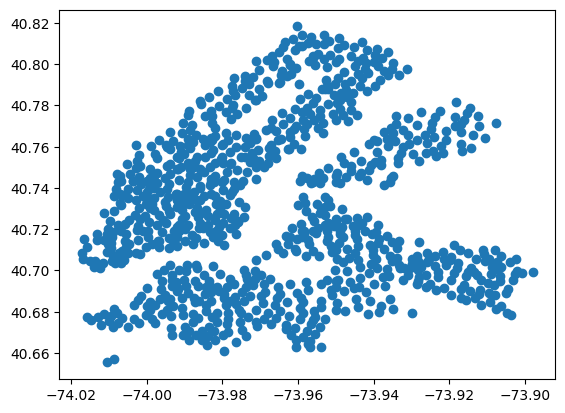

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 1], data[:, 0])

In [9]:
import folium

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
     'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
     'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
     'darkgreen', 'cadetblue', 'darkpurple','pink', 'lightblue', \
     'lightgreen', 'gray', 'black', 'lightgray' ]

map = folium.Map(location=[data[:, 0].mean(), data[:, 1].mean()], zoom_start=12)
for i in range(data.shape[0]):
    folium.CircleMarker(
        location=[data[i, 0], data[i, 1]],
        radius=8, # <-sizes
        weight=2,
        fill=True,
        color=colors[16] # <- colour
    ).add_to(map)
map

#**The task:**
1. Find optimal number of bikine's repare stations by clustering stations coordinates. For that tarsk use KMeans clustering method and find in your opinion two "optimal" numbers of clusters in range [2 to 36].

1.1 For the report plot in colour clustered data and the centroids.

1.2 Calculate the data percentage in a cluster and show in pie diagram.

1.3 Show the report for two "optimal/nice" numbers of clusters in range [2 to 36]




In [11]:
from sklearn.cluster import KMeans

#number of clusters
md=[]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1.1149042091591528, 0.701706021079364, 0.47462750694556144, 0.3862937847051552, 0.30893740453399066, 0.24756233728553628, 0.2113197701557959, 0.1837367684440188, 0.16768745049912182, 0.15198859118594749, 0.1396872626390886, 0.12711076979326957, 0.11615912341981702, 0.1059609315500514, 0.09915801982052885, 0.092754312957527, 0.08794232549468538, 0.08250065353629185, 0.07636703272667988, 0.0741257765671138, 0.06953581595422753, 0.0658874511107214, 0.0630552602147261, 0.06038957889461985, 0.057712408464032305, 0.05603921068820214, 0.05310029205761668, 0.05125730695503943, 0.049332269340242055, 0.04799201814398506, 0.04641959105937867, 0.04522492720863714, 0.04360359425821221, 0.042139169639186215]


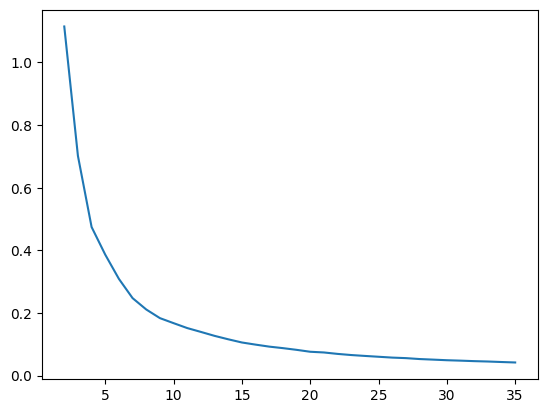

In [17]:
for k in range(2,36):
  kmeans_cluster = KMeans(n_clusters=k)
  kmeans_cluster.fit(data)
  o=kmeans_cluster.inertia_
  md.append(o)
print(md)
plt.plot(list(np.arange(2,36)),md)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

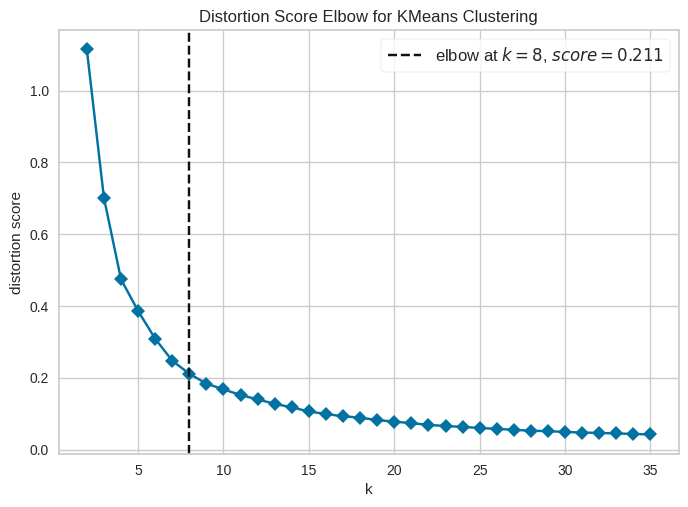

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans_cluster, k=(2,36), metric='distortion', timings=False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show(timings=False)        # Finalize and render the figure

The two optimal numbers of clusters are 7 and 8. For futher calculations I will choose 8

In [20]:
#show labels of the data
k=8
kmeans_cluster = KMeans(n_clusters=k)
kmeans_cluster.fit(data)
labels=kmeans_cluster.labels_
print(labels)

[6 6 6 1 1 1 6 1 6 1 6 6 6 1 1 6 1 6 6 6 6 1 1 6 6 6 6 1 1 1 6 1 6 6 6 1 6
 1 6 1 1 6 1 6 6 6 1 6 1 6 6 1 6 1 6 6 1 6 1 1 6 6 6 6 6 1 1 6 6 1 6 5 6 6
 1 6 6 1 6 1 5 6 1 5 6 1 6 1 1 1 6 1 6 1 1 6 5 5 1 6 1 1 1 6 5 6 6 6 6 5 1
 6 6 1 1 1 5 6 6 1 6 6 6 1 1 6 1 5 6 6 1 5 6 6 1 5 5 6 1 6 6 1 6 1 6 5 5 1
 6 6 1 5 1 5 6 5 1 1 6 1 6 5 1 6 5 5 1 1 5 6 6 5 1 5 6 6 1 1 6 6 6 1 1 5 6
 6 5 6 6 5 5 1 1 6 5 1 5 5 1 5 1 6 1 5 6 1 5 6 6 5 1 6 6 1 5 5 5 1 1 6 1 1
 5 5 5 5 5 5 5 6 6 1 5 1 1 5 5 5 6 6 5 5 5 5 5 5 5 1 5 1 6 1 5 1 6 6 5 5 5
 5 5 5 5 5 6 6 5 5 0 5 6 5 6 6 2 6 5 6 5 5 0 5 2 2 2 5 5 0 5 5 5 5 2 2 2 5
 0 2 1 5 0 5 0 5 5 5 2 5 0 5 5 0 5 5 2 0 5 5 2 0 0 2 5 2 2 2 0 2 5 5 0 0 2
 5 0 0 2 5 5 0 5 0 0 0 0 0 5 2 2 2 2 2 2 0 2 0 2 5 0 0 2 2 0 0 2 2 2 2 0 2
 0 0 5 2 2 0 2 2 2 0 2 0 2 2 2 0 2 0 0 2 2 0 0 2 2 0 2 2 0 0 0 0 2 2 0 2 2
 2 0 0 2 0 2 2 0 2 2 2 0 0 0 0 2 2 0 0 2 0 2 2 2 2 0 2 2 0 2 0 2 2 0 2 0 2
 0 0 2 2 2 0 2 2 2 0 2 2 0 2 0 2 2 2 0 0 2 2 2 2 0 2 0 0 2 2 0 0 2 2 0 2 2
 2 2 0 2 2 2 2 2 2 2 0 2 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Show the centroids of clusters
centroids = kmeans_cluster.cluster_centers_
centroids

array([[ 40.72008524, -73.95109581],
       [ 40.68364201, -73.96011203],
       [ 40.72519594, -73.99619605],
       [ 40.76132064, -73.93208898],
       [ 40.75857603, -73.98095459],
       [ 40.69800332, -73.91910033],
       [ 40.68308861, -73.99168609],
       [ 40.79429424, -73.9549749 ]])

Calculate and show in pie diagram the data percentage in a clusters

[0.10221285563751317, 0.09694415173867228, 0.1917808219178082, 0.0874604847207587, 0.15700737618545837, 0.10748155953635406, 0.12118018967334036, 0.13593256059009484]


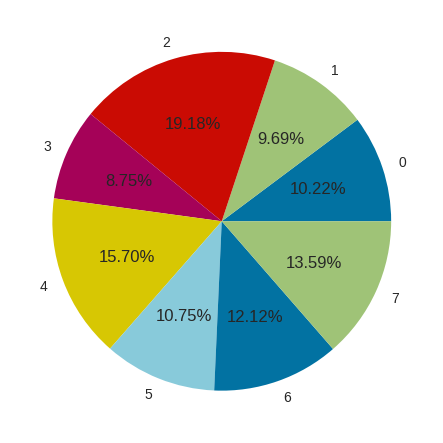

In [22]:
k_labels=list(labels)
percent=[]
for i in range(len(centroids)):

  j=k_labels.count(i)
  j=j/(len(k_labels))
  percent.append(j)

print(percent)
plt.pie(percent,autopct='%1.2f%%',labels=np.arange(len(centroids)))
plt.show()

Colour station location according to cluster number

In [23]:
# add cluster label (clour) for a data location
map = folium.Map(location=[data[:, 0].mean(), data[:, 1].mean()], zoom_start=12)
for i in range(len(data)):
  for j in range(k):
    if labels[i] == j:
        folium.CircleMarker(
        location=[data[i, 0], data[i, 1]],
        radius=8,
        weight=2,
        fill=True,
        color=colors[j] # <- colour
    ).add_to(map)

In [24]:
# add markers for a centroids in black colour
for i in range(len(centroids)):
    folium.CircleMarker(
        location=[centroids[i,0], centroids[i, 1]],
        radius=8,
        weight=5,
        fill=True,
        fill_color='black',
        color='black'
    ).add_to(map)
map